<a href="https://colab.research.google.com/github/unnimaya-vu/unnimaya-vu/blob/main/sms_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

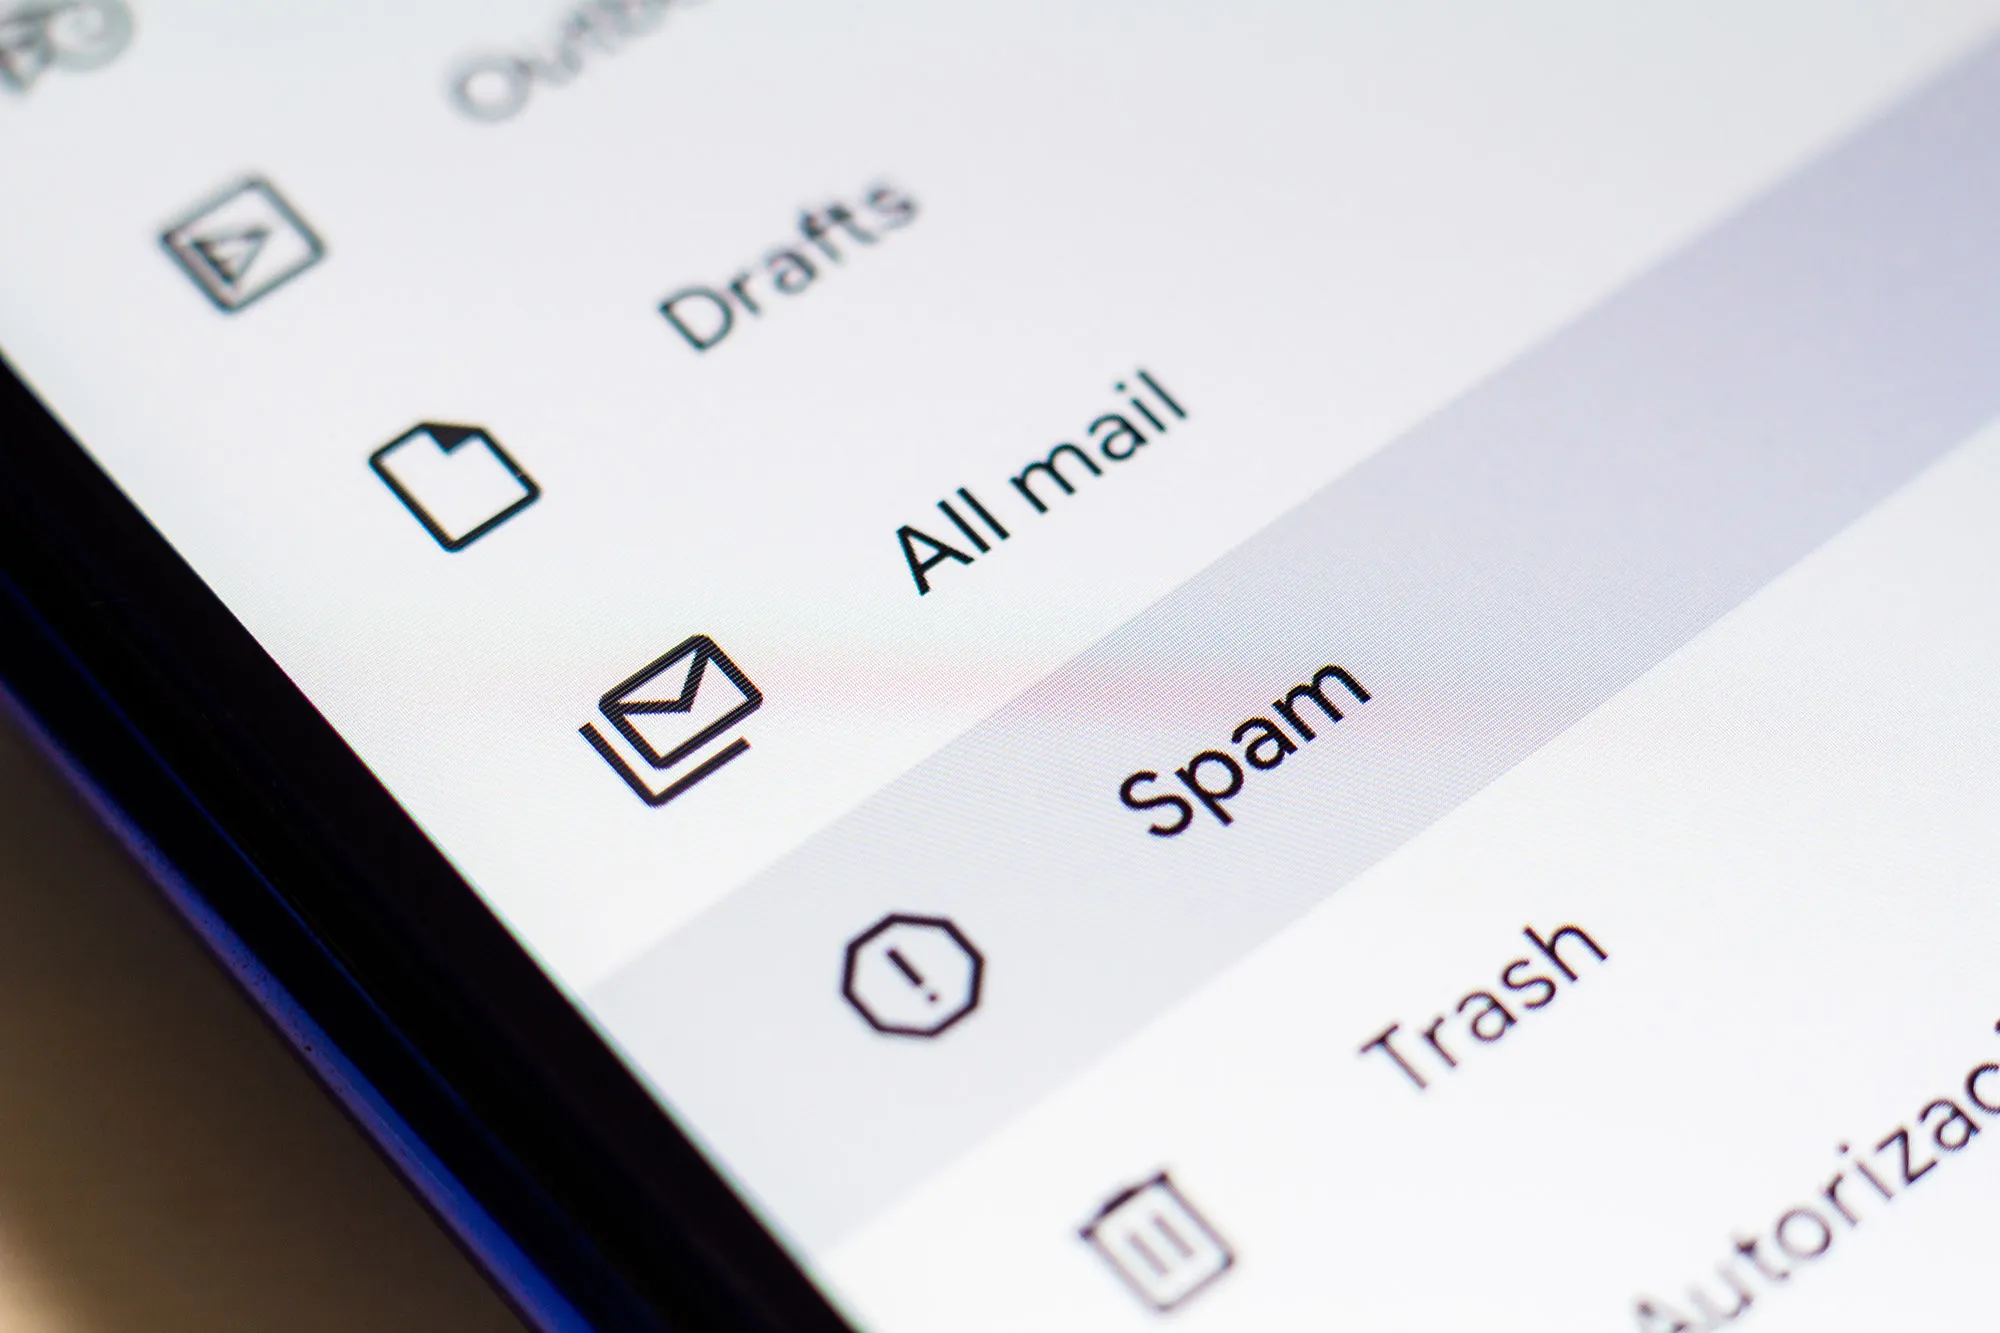

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

Read test data and train data

In [ ]:
df1=pd.read_csv('/content/SMS_train (1).csv',encoding='ISO-8859-1')
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [ ]:
df2=pd.read_csv('/content/SMS_test (2).csv',encoding='ISO-8859-1')
df2.shape

(125, 3)

Concatinating both datasets

In [ ]:
df=pd.concat([df1,df2])

In [ ]:
print(df)

     S. No.                                       Message_body     Label
0         1                         Rofl. Its true to its name  Non-Spam
1         2  The guy did some bitching but I acted like i'd...  Non-Spam
2         3  Pity, * was in mood for that. So...any other s...  Non-Spam
3         4               Will ü b going to esplanade fr home?  Non-Spam
4         5  This is the 2nd time we have tried 2 contact u...      Spam
..      ...                                                ...       ...
120     121  7 wonders in My WORLD 7th You 6th Ur style 5th...  Non-Spam
121     122  Try to do something dear. You read something f...  Non-Spam
122     123  Sun ah... Thk mayb can if dun have anythin on....  Non-Spam
123     124  SYMPTOMS when U are in love: "1.U like listeni...  Non-Spam
124     125  Great. Have a safe trip. Dont panic surrender ...  Non-Spam

[1082 rows x 3 columns]


In [ ]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [ ]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)

In [ ]:
sms=df.Message_body
sms

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [ ]:
df['Label'].unique()

array(['Non-Spam', 'Spam'], dtype=object)

In [ ]:
df['Label'].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

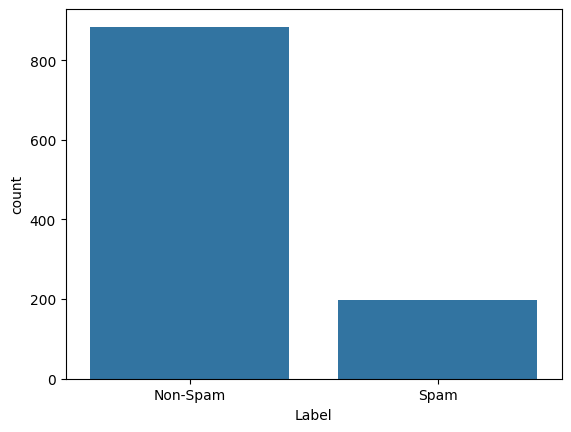

In [ ]:
sns.countplot(x=df['Label'])

In [ ]:
df['Label']=df['Label'].map({'Non-Spam':0,'Spam':1})
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
121,Try to do something dear. You read something f...,0
122,Sun ah... Thk mayb can if dun have anythin on....,0
123,"SYMPTOMS when U are in love: ""1.U like listeni...",0


Downloading needed packages

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Tokenization of training data

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
sms=sms.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
sms

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : " 1 . U like lis...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

Remove special characters

In [ ]:
sms=sms.str.replace('[^a-zA-Z0-9]+',' ')
sms

<ipython-input-17-d97aa4896749>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sms=sms.str.replace('[^a-zA-Z0-9]+',' ')


0                              Rofl Its true to its name
1      The guy did some bitching but I acted like i d...
2      Pity was in mood for that So any other suggest...
3                     Will b going to esplanade fr home 
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear You read something fo...
122    Sun ah Thk mayb can if dun have anythin on Thk...
123    SYMPTOMS when U are in love 1 U like listening...
124     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

Remove nonmeaningful words (words having length less than 3)

In [ ]:
from nltk.tokenize import word_tokenize
sms=sms.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
sms

0                                 Rofl Its true its name
1      The guy did some bitching but acted like inter...
2           Pity was mood for that any other suggestions
3                              Will going esplanade home
4      This the 2nd time have tried contact have won ...
                             ...                        
120    wonders WORLD 7th You 6th style 5th smile 4th ...
121      Try something dear You read something for exams
122    Sun Thk mayb can dun have anythin Thk have boo...
123    SYMPTOMS when are love like listening songs ge...
124        Great Have safe trip Dont panic surrender all
Name: Message_body, Length: 1082, dtype: object

Stemming

Converted into lowercase

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
sms=sms.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
sms

0                                   rofl it true it name
1      the guy did some bitch but act like interest b...
2               piti was mood for that ani other suggest
3                                  will go esplanad home
4      this the 2nd time have tri contact have won th...
                             ...                        
120    wonder world 7th you 6th style 5th smile 4th p...
121             tri someth dear you read someth for exam
122    sun thk mayb can dun have anythin thk have boo...
123    symptom when are love like listen song get sto...
124          great have safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

Removal of stopwords

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
sms=sms.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
sms

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                       go esplanad home
4      2nd time tri contact 750 pound prize claim eas...
                             ...                        
120    wonder world 7th 6th style 5th smile 4th perso...
121                     tri someth dear read someth exam
122    sun thk mayb dun anythin thk book lesson pilat...
123    symptom love like listen song get stop see nam...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

Vectorization-converting complete data into numerical data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(sms)
train_data.shape

(1082, 2853)

In [ ]:
print(train_data)

  (0, 1751)	0.5086856793431559
  (0, 2603)	0.5352804139572925
  (0, 2146)	0.6743246681420617
  (1, 1122)	0.1977601804079742
  (1, 1167)	0.32809784984076795
  (1, 2740)	0.22799692523276513
  (1, 1779)	0.26514476216742267
  (1, 972)	0.30392006451010634
  (1, 2331)	0.2751324774651613
  (1, 628)	0.2751324774651613
  (1, 1391)	0.3187189191538061
  (1, 1533)	0.2174075457753962
  (1, 353)	0.35437558793533497
  (1, 559)	0.3752334020731641
  (1, 1236)	0.26826339572857744
  (2, 2429)	0.5165656915002457
  (2, 418)	0.36716239650585775
  (2, 1708)	0.5469696796701571
  (2, 1930)	0.5469696796701571
  (3, 1308)	0.47434824349351795
  (3, 998)	0.7276196298199475
  (3, 1192)	0.4955435583228748
  (4, 2060)	0.24880867841085
  (4, 1756)	0.2883944867284856
  (4, 1674)	0.2570526577689625
  :	:
  (1079, 1852)	0.2706898396742334
  (1079, 1724)	0.2706898396742334
  (1079, 2434)	0.26153957460502464
  (1079, 1522)	0.24774213284441401
  (1079, 580)	0.2374366876682329
  (1079, 2524)	0.49548426568882803
  (1079, 1642

In [ ]:
x_train=train_data
y=df['Label'].values
x_train.ndim

2

Train data Test data splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train.shape

(757, 2853)

Model creation using KNN, Naive Bayes,SVM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=MultinomialNB()
s_model=SVC()
lst_model=[k_model,n_model,s_model]

In [ ]:
for i in lst_model:
  print('Model is',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('*'*50)
  print('Accuracy score is',accuracy_score(y_test,y_pred))
  print('-------Classification Report-----------')
  print(classification_report(y_test,y_pred))

Model is KNeighborsClassifier(n_neighbors=7)
**************************************************
Accuracy score is 0.8338461538461538
-------Classification Report-----------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       269
           1       1.00      0.04      0.07        56

    accuracy                           0.83       325
   macro avg       0.92      0.52      0.49       325
weighted avg       0.86      0.83      0.76       325

Model is MultinomialNB()
**************************************************
Accuracy score is 0.9353846153846154
-------Classification Report-----------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       269
           1       1.00      0.62      0.77        56

    accuracy                           0.94       325
   macro avg       0.96      0.81      0.87       325
weighted avg       0.94      0.94      0.93       325

Model is SVC()
*****